## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. <br>
Each measurement (i.e. each row of the input file) consists of a flag that specifies: <br>
the type of message ('HEAD', which in this case is always 1), <br>
two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), <br> 
and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS').<br>
Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [1]:
# If you didn't download it yet, please get the relevant file now!
!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

--2023-02-14 16:46:40--  https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.66.18, 2620:100:6025:18::a27d:4512
Connessione a www.dropbox.com (www.dropbox.com)|162.125.66.18|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: /s/raw/xvjzaxzz3ysphme/data_000637.txt [segue]
--2023-02-14 16:46:41--  https://www.dropbox.com/s/raw/xvjzaxzz3ysphme/data_000637.txt
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://ucad00e9afcdb64bc668212ffef9.dl.dropboxusercontent.com/cd/0/inline/B2fHJHoSfB0qPKQlvpZoTwiHVnDkHymIYItLya5tJU20J2SFkSbvYO3zOSC39krugsjkA89_7xmOhkZjanPKheVtCZ12uhUo2xiBjuFtgU2WOuN-U7CF8bqDFLRL3KwZm1y2i_GmC7anG4KJpz33RuwalIGICACPbEHuB8MNdfnQFA/file# [segue]
--2023-02-14 16:46:41--  https://ucad00e9afcdb64bc668212ffef9.dl.dropboxusercontent.com/cd/0/inline/B2fHJHoSfB0qPKQlvpZoTwiHVnDkHymIYItLya5tJU

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

In [3]:
dati = pd.read_csv('data_000637.txt')
dati

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0


2\. Find out the number of BX in a ORBIT (the value 'x').

In [4]:
x = np.max(dati['BX_COUNTER'])+1
print('Max value of BX_CPUNTER:', x)

Max value of BX_CPUNTER: 3564


3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

In [5]:
offset = dati['TDC_MEAS'][0]*25/30 + dati['BX_COUNTER'][0]*25 + dati['ORBIT_CNT'][0]*x*25
nrows = np.max(dati.index)
print(nrows)
time = dati['TDC_MEAS']*25/30 + dati['BX_COUNTER']*25 + dati['ORBIT_CNT']*x*25 -offset

print('Le misure sono durate', time[nrows], 'nanosecondi')

1310719
Le misure sono durate 980416093.3125 nanosecondi


4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

In [6]:
dati['TIME'] = time
dati

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,TIME
0,1,0,123,3869200167,2374,26,0.000000e+00
1,1,0,124,3869200167,2374,27,8.125000e-01
2,1,0,63,3869200167,2553,28,4.476625e+03
3,1,0,64,3869200167,2558,19,4.594125e+03
4,1,0,64,3869200167,2760,25,9.649125e+03
...,...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14,9.804161e+08
1310716,1,1,4,3869211171,763,11,9.804161e+08
1310717,1,0,64,3869211171,764,0,9.804161e+08
1310718,1,0,139,3869211171,769,0,9.804163e+08


5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

In [7]:
dati['HEAD'] = np.random.randint(0, 2, size=(nrows+1,))
dati

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,TIME
0,0,0,123,3869200167,2374,26,0.000000e+00
1,1,0,124,3869200167,2374,27,8.125000e-01
2,1,0,63,3869200167,2553,28,4.476625e+03
3,0,0,64,3869200167,2558,19,4.594125e+03
4,0,0,64,3869200167,2760,25,9.649125e+03
...,...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14,9.804161e+08
1310716,0,1,4,3869211171,763,11,9.804161e+08
1310717,1,0,64,3869211171,764,0,9.804161e+08
1310718,1,0,139,3869211171,769,0,9.804163e+08


6\. Create a new DataFrame that contains only the rows with HEAD=1.

In [8]:
new_dati = dati[dati['HEAD']==1]
new_dati

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,TIME
1,1,0,124,3869200167,2374,27,8.125000e-01
2,1,0,63,3869200167,2553,28,4.476625e+03
6,1,0,61,3869200167,2772,14,9.940000e+03
7,1,0,139,3869200167,2776,0,1.002831e+04
9,1,0,60,3869200167,2788,7,1.033412e+04
...,...,...,...,...,...,...,...
1310713,1,0,64,3869211171,758,18,9.804160e+08
1310714,1,0,60,3869211171,762,2,9.804161e+08
1310715,1,0,62,3869211171,762,14,9.804161e+08
1310717,1,0,64,3869211171,764,0,9.804161e+08


7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

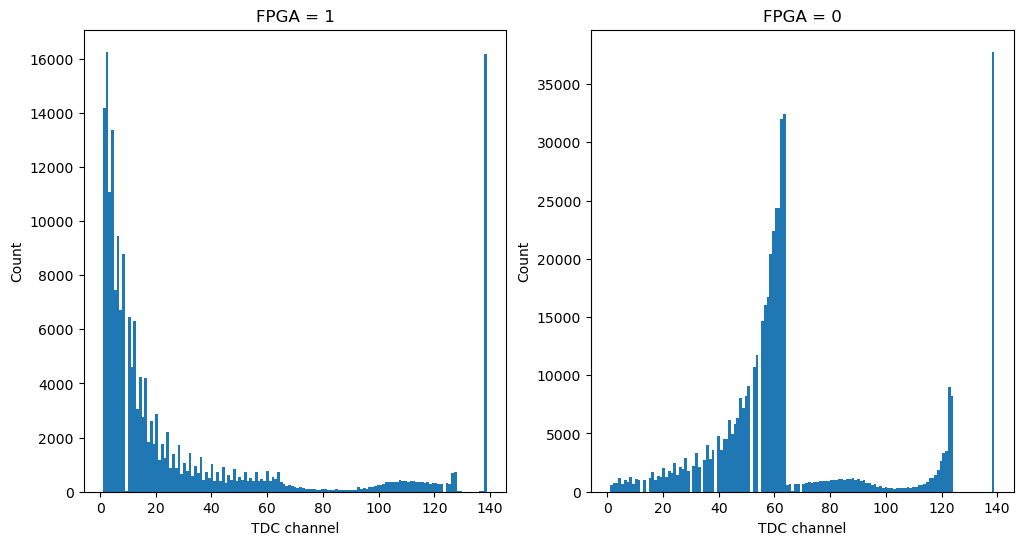

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

ax1.hist(new_dati[new_dati['FPGA']==1]['TDC_CHANNEL'], bins=np.max(new_dati['TDC_CHANNEL']))
ax1.set_title('FPGA = 1')
ax1.set_xlabel('TDC channel')
ax1.set_ylabel('Count')

ax2.hist(new_dati[new_dati['FPGA']==0]['TDC_CHANNEL'], bins=140)
ax2.set_title('FPGA = 0')
ax2.set_xlabel('TDC channel')
ax2.set_ylabel('Count')

plt.show()

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

In [10]:
noisy = new_dati.groupby([new_dati['FPGA'], new_dati['TDC_CHANNEL']])['TDC_CHANNEL'].count().sort_values(ascending=False).head(3)                                        
print('The noisy channels are:', '\n', noisy)

The noisy channels are: 
 FPGA  TDC_CHANNEL
0     139            37783
      64             32400
      63             31977
Name: TDC_CHANNEL, dtype: int64


9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [11]:
print('The number of unique orbits are:', new_dati['ORBIT_CNT'].nunique())
print('The number of unique orbits with TDC_CHANNEL=139 are:', new_dati[new_dati['TDC_CHANNEL']==139]['ORBIT_CNT'].nunique())

The number of unique orbits are: 10998
The number of unique orbits with TDC_CHANNEL=139 are: 10843
